<a href="https://colab.research.google.com/github/2303A53017/AIML-Lab-Batch-45-46/blob/main/Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [34]:
# Load the dataset (Make sure to upload the dataset file in Colab first)
file_path = '/content/drive/MyDrive/employee turnover.csv'  # Update the file path if needed
data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows and check basic info
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


(        stag  event gender   age         industry  profession      traffic  \
 0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
 1  22.965092      1      m  33.0            Banks          HR        empjs   
 2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
 3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
 4   8.410678      1      m  32.0           Retail  Commercial        youjs   
 
   coach head_gender greywage  way  extraversion  independ  selfcontrol  \
 0    no           f    white  bus           6.2       4.1          5.7   
 1    no           m    white  bus           6.2       4.1          5.7   
 2    no           m    white  bus           6.2       6.2          2.6   
 3    no           m    white  bus           5.4       7.6          4.9   
 4   yes           f    white  bus           3.0       4.1          8.0   
 
    anxiety  novator  
 0      7.1      8.3  
 1      7.1      8.3  
 2 

<ipython-input-35-dabb87676e03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='event', y='extraversion', data=data, palette='Set2')


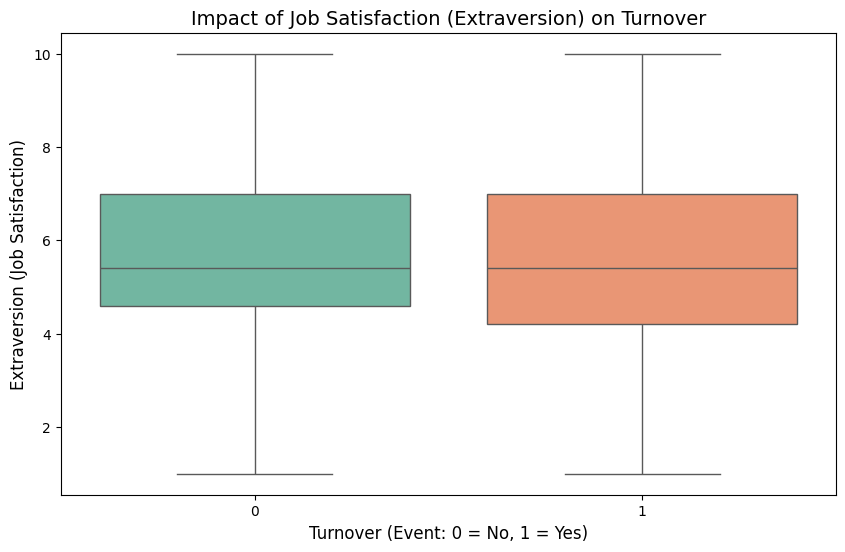

In [35]:
# 1. Visualizing the impact of job satisfaction (extraversion) on turnover (event)
plt.figure(figsize=(10, 6))
sns.boxplot(x='event', y='extraversion', data=data, palette='Set2')
plt.title('Impact of Job Satisfaction (Extraversion) on Turnover', fontsize=14)
plt.xlabel('Turnover (Event: 0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Extraversion (Job Satisfaction)', fontsize=12)
plt.show()

In [36]:
# 2. One-hot encoding for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,stag,event,age,extraversion,independ,selfcontrol,anxiety,novator,gender_m,industry_Agriculture,...,traffic_rabrecNErab,traffic_recNErab,traffic_referal,traffic_youjs,coach_no,coach_yes,head_gender_m,greywage_white,way_car,way_foot
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,True,False,...,True,False,False,False,True,False,False,True,False,False
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,True,False,...,False,False,False,False,True,False,True,True,False,False
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,False,False,...,True,False,False,False,True,False,True,True,False,False
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,False,False,...,True,False,False,False,True,False,True,True,False,False
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,True,False,...,False,False,False,True,False,True,False,True,False,False


In [37]:
# 3. Handle missing values (imputation)
# Using SimpleImputer to fill missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
data_encoded_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

# Check for any missing values after imputation
data_encoded_imputed.isnull().sum()

,0
stag,0
event,0
age,0
extraversion,0
independ,0
selfcontrol,0
anxiety,0
novator,0
gender_m,0
industry_Agriculture,0


In [40]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Assuming 'data_encoded_imputed' is your preprocessed DataFrame and 'event' is your target variable
# Separate features (X) and target (y)
X = data_encoded_imputed.drop('event', axis=1) # Features (all columns except 'event')
y = data_encoded_imputed['event']              # Target variable ('event')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# 5. Model Training - Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train) # Now X_train and y_train are defined

DecisionTreeClassifier(random_state=42)

In [41]:
# 6. Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.5885
ROC-AUC: 0.5895
